In [1]:
remotes::install_github("peeter-t2/digar.txts",lib="R_pckg/",upgrade="never")
library(digar.txts,lib.loc="R_pckg/")

* checking for file ‘/tmp/RtmpSrykHh/remotes76aa6770db7d/peeter-t2-digar.txts-b87e10a/DESCRIPTION’ ... OK
* preparing ‘digar.txts’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘digar.txts_0.0.0.9100.tar.gz’
Warning in sprintf(gettext(fmt, domain = domain), ...) :
  one argument not used by format 'invalid uid value replaced by that for user 'nobody''



Loading required package: data.table



In [2]:
library(tidyverse)
library(igraph)
install.packages('tidytext', lib='~/R_pckg')
library(tidytext, lib.loc='~/R_pckg')
install.packages('ggraph', lib='~/R_pckg')
library(ggraph, lib.loc='~/R_pckg')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose

In [3]:
all_issues <- get_digar_overview()

[1] "Issue metadata read"


In [4]:
stopsonad <- read.table("estonian-stopwords-lemmas.txt", header = TRUE, sep = "\t", encoding = "UTF-8", stringsAsFactors = T)

In [5]:
rootsi_ajalehed1 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1943&year<1961) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [6]:
searchterm <- "balti"
searchfile <- "rootsi_ngrammid1.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed1, searchtype="lemmas", source="pages")

In [7]:
concs1 <- fread("rootsi_ngrammid1.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
concs1[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta_concs1 <- concs1 %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed1 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [8]:
rootsi_concs1 <- get_concordances(searchterm=searchterm,texts=concs1,before=50,after=50,txt="lemmas",id="id")

In [9]:
rootsi_concs_4460 <- rootsi_concs1[, !c("id","nr","begin","end", "DocumentID")]

write.table(rootsi_concs_4460, "4460.txt", sep="\t", quote = F, row.names = F)

In [10]:
rootsi_concs_4460_2 <- str_replace_all(rootsi_concs_4460$context, "\\|", "_")

rootsi_concs_4460_3 <- as.data.frame(rootsi_concs_4460_2, header = TRUE)
colnames(rootsi_concs_4460_3) <- "context"
head(rootsi_concs_4460_3, 10)

,context
,<chr>
1,"uma_kutsutud eesti , läti ja leedu rahvas esindus balti komitee . eestlane esindaja võtma komitee juhtimi"
2,d Moskva ka Türgi välispoliitika juht Saraeoglu . balti maa esindaja olema sundima_sunnitud andma_antud o
3,"elgia Taani Kopenhaagen , 28. juuli . Kopenhaagen balti põgenik laager jõudma eestlane , kes oma põgenemi"
4,kes kõik olema nn . Baltikum laager . üldse olema balti riik kodanik seal umbes 100 inimene . teine eestl
5,"valdama_avaldatud . Unrra poolt teatama veel , et balti riik kodaku_kodakud , kes oma kodumaa tagasi ei t"
6,nike praktiseerimine võimalus laiendama . Arste - balti põgenik tahtma rakendama Rootsi Punane_Punas Rist
7,"rd kuulma , et Potsdam võima päevakord kerkima ka balti riik tulevik küsimus . teatavasti ei olema Inglis"
8,e kodanik . 970 see olema haige ja ülejäänu olema balti maa . Inglis ametivõim ei vaatama aga tema kui ’‘
9,aheline organisatsioon esindaja Poolamaa ja teine balti maa ; 4 ) nõukogu vene sõjavägi lahkumine Poolaj


In [11]:
bigrams_separated1 <- rootsi_concs_4460_3 %>%
  unnest_tokens(bigram, context, token = "ngrams", n = 2) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

In [12]:
bigrams_filtered1 <- bigrams_separated1 %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word)

In [13]:
# new bigram counts:
bigram_counts1 <- bigrams_filtered1 %>% 
  count(word1, word2, sort = TRUE)

In [14]:
bigram_graph1 <- bigram_counts1 %>%
  filter(row_number() <= 30) %>%
  graph_from_data_frame()

In [15]:
bigram_graph1

IGRAPH 01ce910 DN-- 32 30 -- 
+ attr: name (v/c), n (e/n)
+ edges from 01ce910 (vertex names):
 [1] balti   ->riik           balti   ->rahvas         balti   ->põgenik       
 [4] kolm    ->balti          balti   ->komitee        balti   ->ülikool       
 [7] balti   ->sakslane       balti   ->meri           balti   ->pagulane      
[10] balti   ->humanist       balti   ->rahvus         humanist->ühing         
[13] balti   ->maa            balti   ->saks           riik    ->küsimus       
[16] balti   ->küsimus        riik    ->iseseisvus     riik    ->esindaja      
[19] riik    ->annekteerimine balti   ->vabariik       eesti   ->läti          
[22] new     ->york           riik    ->saatus        
+ ... omitted several edges

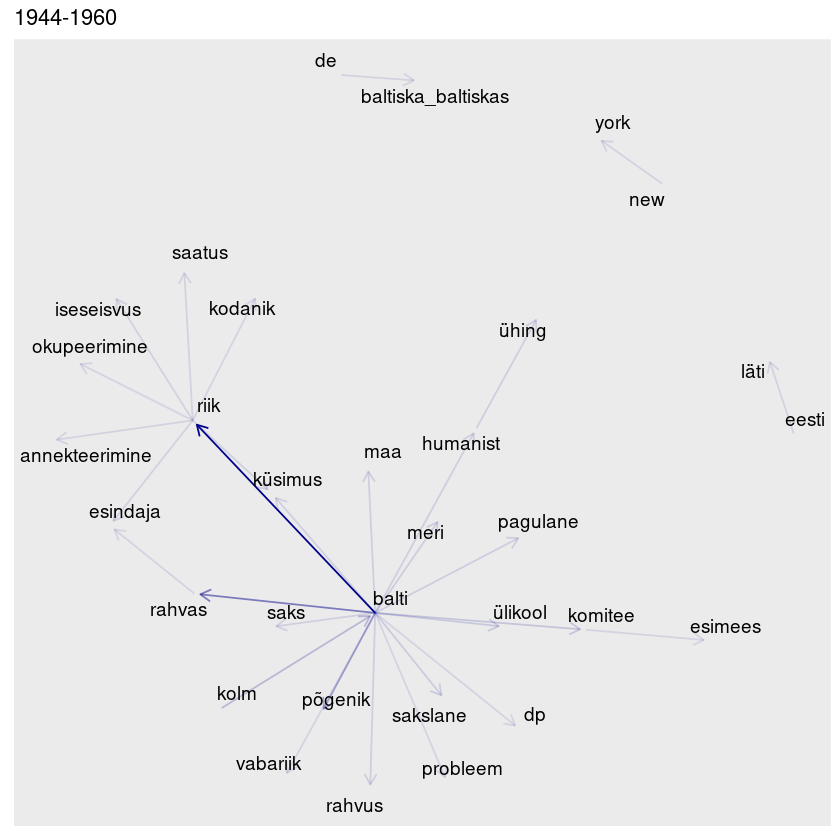

In [16]:
set.seed(2017)

a <- grid::arrow(type = "open", length = unit(.10, "inches"))

ggraph(bigram_graph1, layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = circle(.05, 'inches'), color = "darkblue") +
    geom_node_text(aes(label = name), repel = TRUE, size=4) +
ggtitle("1944-1960")

In [17]:
#Skip_ngram

In [18]:
#suurendan tähemärkide vahemikku 100 peale
rootsi_concs1_1 <- get_concordances(searchterm=searchterm,texts=concs1,before=100,after=100,txt="lemmas",id="id")

In [19]:
rootsi_concs_4460_2_1 <- rootsi_concs1_1[, !c("id","nr","begin","end", "DocumentID")]

write.table(rootsi_concs_4460, "4460_2.txt", sep="\t", quote = F, row.names = F)

In [20]:
rootsi_concs_4460_2_2 <- str_replace_all(rootsi_concs_4460_2_1$context, "\\|", "_")

rootsi_concs_4460_3_1 <- as.data.frame(rootsi_concs_4460_2_2, header = TRUE)
colnames(rootsi_concs_4460_3_1) <- "context"
head(rootsi_concs_4460_3_1, 10)

,context
,<chr>
1,"oniIsoon puuduma . olema teadma , et seal elu kutsuma_kutsutud eesti , läti ja leedu rahvas esindus balti komitee . eestlane esindaja võtma komitee juhtimine osa prof , Ein . lähem teade see tsoon puuduma"
2,"uhtes . koos Baltimaa välisminister kutsuma tookord Moskva ka Türgi välispoliitika juht Saraeoglu . balti maa esindaja olema sundima_sunnitud andma_antud olukord kaugeleulatuv järeleandmine tegema , kuid S"
3,"õgenik Sudeedimaait läbi Saks_Saksa , Holland ja Belgia Taani Kopenhaagen , 28. juuli . Kopenhaagen balti põgenik laager jõudma eestlane , kes oma põgenemisretk ’ Eesti läbistama Saksamaa , Holland ja Belg"
4,"li . Brüssel olema eestlane 30-35 inimene ümber , kes kõik olema nn . Baltikum laager . üldse olema balti riik kodanik seal umbes 100 inimene . teine eestlane jääma kõik sinna , kuna seal olema võrdlemisi"
5,"im teenistus minema . mingisugune surve keegi ei avaldama_avaldatud . Unrra poolt teatama veel , et balti riik kodaku_kodakud , kes oma kodumaa tagasi ei tahtma minema , paigutama ■ taks omaette koloonia S"
6,d_panema ka raamat I osa koostamine . Arstide-pogenike praktiseerimine võimalus laiendama . Arste - balti põgenik tahtma rakendama Rootsi Punane_Punas Risti hooldus olev põgenik ravimine . seni olema eesti
7,"jne . mõningas allikas saadud_saama teade olema kord kuulma , et Potsdam võima päevakord kerkima ka balti riik tulevik küsimus . teatavasti ei olema Inglismaa ja Ameerika tunnustama_tunnustanud praegune ol"
8,"rkima_märkinud , et üksi Norra asuma veel 60DD Vene kodanik . 970 see olema haige ja ülejäänu olema balti maa . Inglis ametivõim ei vaatama aga tema kui ’‘ ene kodanik , ütlema Golikov , ja ei laskma ene e"
9,"vabastama ; 3 ) vaba sissepääs võimaldama rahvusvaheline organisatsioon esindaja Poolamaa ja teine balti maa ; 4 ) nõukogu vene sõjavägi lahkumine Poolaj ^ aalt ; VO - 0 ) ja palve , et . ühendama_ühendat"


In [21]:
bigrams_separated1_1 <- rootsi_concs_4460_3_1 %>%
  unnest_tokens(bigram, context, token = "skip_ngrams", n = 3, k = 3) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

bigrams_separated1_2 <- na.omit(bigrams_separated1_1)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 5628352 rows [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 27, 28, 29, 30, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 429962 rows [1, 22, 43, 64, 85, 106, 127, 148, 169, 190, 211, 232, 253, 274, 295, 316, 337, 358, 379, 400, ...].”


In [22]:
bigrams_filtered1_1 <- bigrams_separated1_2 %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word)

In [23]:
bigram_counts1_1 <- bigrams_filtered1_1 %>% 
  count(word1, word2, sort = TRUE)

In [24]:
bigram_graph1_1 <- bigram_counts1_1 %>%
  filter(row_number() <= 30) %>%
  graph_from_data_frame()

In [25]:
bigram_graph1_1

IGRAPH 6bbba02 DN-- 25 30 -- 
+ attr: name (v/c), n (e/n)
+ edges from 6bbba02 (vertex names):
 [1] balti ->riik       balti ->rahvas     balti ->põgenik    kolm  ->balti     
 [5] balti ->küsimus    eesti ->balti      balti ->esindaja   balti ->komitee   
 [9] balti ->eesti      balti ->ülikool    kolm  ->riik       eesti ->läti      
[13] läti  ->leedu      balti ->sakslane   eesti ->leedu      rootsi->balti     
[17] riik  ->küsimus    balti ->ühing      balti ->pagulane   balti ->nõukogu   
[21] balti ->maa        balti ->meri       riik  ->esindaja   balti ->rootsi    
[25] balti ->balti      new   ->york       balti ->saatus     balti ->rahvus    
[29] balti ->iseseisvus balti ->humanist  

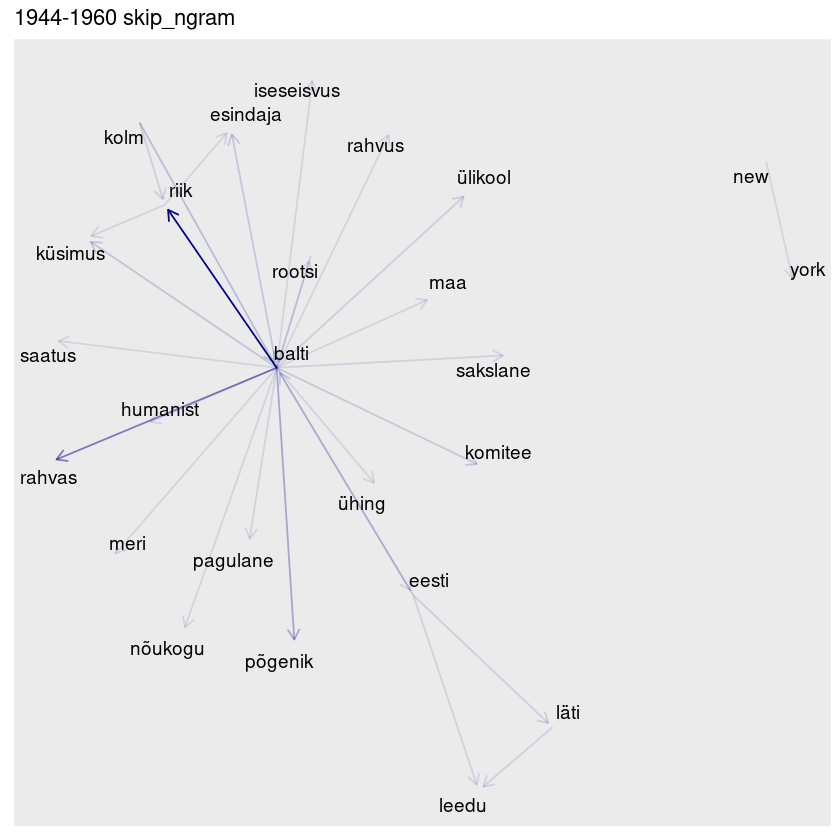

In [26]:
set.seed(2017)

a <- grid::arrow(type = "open", length = unit(.10, "inches"))

ggraph(bigram_graph1_1, layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = circle(.05, 'inches'), color = "darkblue") +
    geom_node_text(aes(label = name), repel = TRUE, size=4) +
ggtitle("1944-1960 skip_ngram")

In [27]:
rootsi_ajalehed2 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1960&year<1985) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [28]:
searchfile <- "rootsi_ngrammid2.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed2, searchtype="lemmas", source="pages")

In [29]:
concs2 <- fread("rootsi_ngrammid2.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
concs2[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta_concs2 <- concs2 %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed2 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [30]:
rootsi_concs2 <- get_concordances(searchterm=searchterm,texts=concs2,before=50,after=50,txt="lemmas",id="id")

In [31]:
rootsi_concs_6184 <- rootsi_concs2[, !c("id","nr","begin","end", "DocumentID")]

write.table(rootsi_concs_6184, "6184.txt", sep="\t", quote = F, row.names = F)

In [32]:
rootsi_concs_6184_2 <- str_replace_all(rootsi_concs_6184$context, "\\|", "_")

rootsi_concs_6184_3 <- as.data.frame(rootsi_concs_6184_2, header = TRUE)
colnames(rootsi_concs_6184_3) <- "context"
head(rootsi_concs_6184_3, 10)

,context
,<chr>
1,"itte kuidagi kaasuma » ida kest ja kah » t & gt ■ balti riik viigivnlds » annektmoonl ja S , KHtu Inkorpo"
2,"foorum , sama ! aeg andma oma ahi Eesti ja teine balti rahvas võõrandama õigus laastamine . mina vlme sa"
3,"õigus laastamine . mina vlme samuti rõhutama , et balti riik iseseisvus olema oluline balti meri vabadus"
4,"rõhutama , et balti riik iseseisvus olema oluline balti meri vabadus ja see kogu Euroopa julgeolek vaba n"
5,"ku * kontsert tolmuma Chicago *, IndianspolisNi ( balti kontserttihlngu kontsert sari *}, Bo * io # is ba"
6,"ti kontserttihlngu kontsert sari *}, Bo * io # is balti kontsert sari * ( 20 ,’ jaanuar }, Bartfort *. Ne"
7,"de , mis nähtus , et mööduma_möödunud aasta olema balti komitee juba 38 aasta kestma_kestnud tegeras olem"
8,"as olema_olnud kõige aktiivsem ja tulemusrikkam , balti põgenik Eesti jöuhtpuu i Vake ^ ttaja ees . 1 . w"
9,olema min . V. Sidzikauskaa . see organ andma ka balti komitee kaudud_kauduma väiksem majandusiik_majand


In [33]:
bigrams_separated2 <- rootsi_concs_6184_3 %>%
  unnest_tokens(bigram, context, token = "ngrams", n = 2) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

In [34]:
bigrams_filtered2 <- bigrams_separated2 %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word)

In [35]:
bigram_counts2 <- bigrams_filtered2 %>% 
  count(word1, word2, sort = TRUE)

In [36]:
bigram_graph2 <- bigram_counts2 %>%
  filter(row_number() <= 30) %>%
  graph_from_data_frame()

In [37]:
bigram_graph2

IGRAPH 353b96e DN-- 33 30 -- 
+ attr: name (v/c), n (e/n)
+ edges from 353b96e (vertex names):
 [1] balti             ->riik              
 [2] balti             ->rahvas            
 [3] balti             ->komitee           
 [4] de                ->baltiska_baltiskas
 [5] balti             ->instituut         
 [6] kolm              ->balti             
 [7] balti             ->organisatsioon    
 [8] balti             ->küsimus           
+ ... omitted several edges

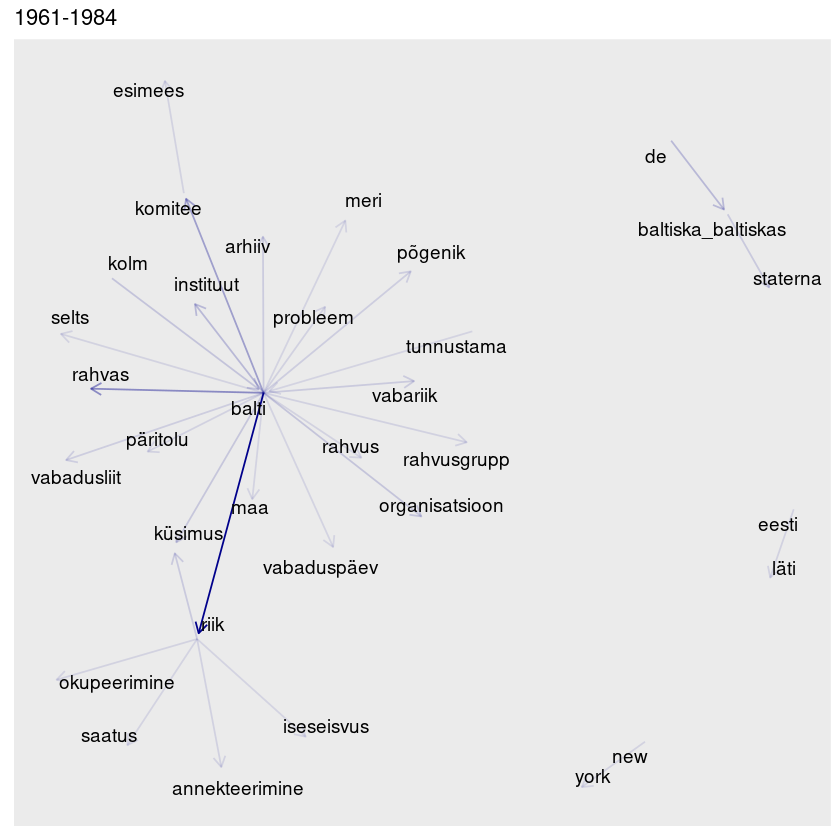

In [38]:
set.seed(2017)

a <- grid::arrow(type = "open", length = unit(.10, "inches"))

ggraph(bigram_graph2, layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = circle(.05, 'inches'), color = "darkblue") +
    geom_node_text(aes(label = name), repel = TRUE, size=4) +
ggtitle("1961-1984")

In [39]:
#suurendan tähemärkide vahemikku 100 peale
rootsi_concs2_1 <- get_concordances(searchterm=searchterm,texts=concs2,before=100,after=100,txt="lemmas",id="id")

In [40]:
rootsi_concs_6184_2_1 <- rootsi_concs2_1[, !c("id","nr","begin","end", "DocumentID")]

write.table(rootsi_concs_6184_2_1, "6184_2.txt", sep="\t", quote = F, row.names = F)

In [41]:
rootsi_concs_6184_2_2 <- str_replace_all(rootsi_concs_6184_2_1$context, "\\|", "_")

rootsi_concs_6184_3_1 <- as.data.frame(rootsi_concs_6184_2_2, header = TRUE)
colnames(rootsi_concs_6184_3_1) <- "context"
head(rootsi_concs_6184_3_1, 10)

,context
,<chr>
1,"osas ms .... Mvi » paluma Thrndriik viililHiist mitte kuidagi kaasuma » ida kest ja kah » t & gt ■ balti riik viigivnlds » annektmoonl ja S , KHtu InkorpoTwrimine iunmistamisvli *. Mel » ja kolk Inse_Inse"
2,"vabadus eest , nii otseselt kui ka rahvusvaheline foorum , sama ! aeg andma oma ahi Eesti ja teine balti rahvas võõrandama õigus laastamine . mina vlme samuti rõhutama , et balti riik iseseisvus olema olu"
3,"ma oma ahi Eesti ja teine balti rahvas võõrandama õigus laastamine . mina vlme samuti rõhutama , et balti riik iseseisvus olema oluline balti meri vabadus ja see kogu Euroopa julgeolek vaba nmnilniHkauband"
4,"as võõrandama õigus laastamine . mina vlme samuti rõhutama , et balti riik iseseisvus olema oluline balti meri vabadus ja see kogu Euroopa julgeolek vaba nmnilniHkaubanduw ’ ai gule .” ühine lervituskirjo"
5,"mi * kulgema Montreal Toronto , * e * H USA-asp , ku * kontsert tolmuma Chicago *, IndianspolisNi ( balti kontserttihlngu kontsert sari *}, Bo * io # is balti kontsert sari * ( 20 ,’ jaanuar }, Bartfort *."
6,"* kontsert tolmuma Chicago *, IndianspolisNi ( balti kontserttihlngu kontsert sari *}, Bo * io # is balti kontsert sari * ( 20 ,’ jaanuar }, Bartfort *. New York * ( 2 jaan .). Beahrookis , Utke-w-oodSs ja"
7,"hr A. Horm esitama komitee 1060. ». tegevus ülevaade , mis nähtus , et mööduma_möödunud aasta olema balti komitee juba 38 aasta kestma_kestnud tegeras olema_olnud kõige aktiivsem ja tulemusrikkam , balti p"
8,"a balti komitee juba 38 aasta kestma_kestnud tegeras olema_olnud kõige aktiivsem ja tulemusrikkam , balti põgenik Eesti jöuhtpuu i Vake ^ ttaja ees . 1 . wnamüTrt \ Wakiunoton & lt ; VV » - Kul I « vad . k"
9,"” Baltic Siates 1 ^’ eedom Couneil ”, mis esimees olema min . V. Sidzikauskaa . see organ andma ka balti komitee kaudud_kauduma väiksem majandusiik_majandusiiku toetus aktsioon läbi viimine Skandinaavia ."


In [42]:
bigrams_separated2_1 <- rootsi_concs_6184_3 %>%
  unnest_tokens(bigram, context, token = "skip_ngrams", n = 3, k = 3) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

bigrams_separated2_2 <- na.omit(bigrams_separated2_1)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 3198072 rows [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 27, 28, 29, 30, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 306074 rows [1, 22, 43, 64, 85, 106, 127, 148, 169, 190, 210, 228, 243, 254, 261, 265, 267, 268, 289, 310, ...].”


In [43]:
bigrams_filtered2_1 <- bigrams_separated2_2 %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word)

In [44]:
bigram_counts2_1 <- bigrams_filtered2_1 %>% 
  count(word1, word2, sort = TRUE)

In [45]:
bigram_graph2_1 <- bigram_counts2_1 %>%
  filter(row_number() <= 30) %>%
  graph_from_data_frame()

In [46]:
bigram_graph2_1

IGRAPH fef3c21 DN-- 25 30 -- 
+ attr: name (v/c), n (e/n)
+ edges from fef3c21 (vertex names):
 [1] balti ->riik               balti ->rahvas            
 [3] balti ->komitee            balti ->küsimus           
 [5] eesti ->balti              de    ->baltiska_baltiskas
 [7] balti ->instituut          kolm  ->balti             
 [9] balti ->organisatsioon     balti ->esindaja          
[11] balti ->balti              balti ->eesti             
[13] riik  ->küsimus            balti ->arhiiv            
[15] rootsi->balti              balti ->vabariik          
+ ... omitted several edges

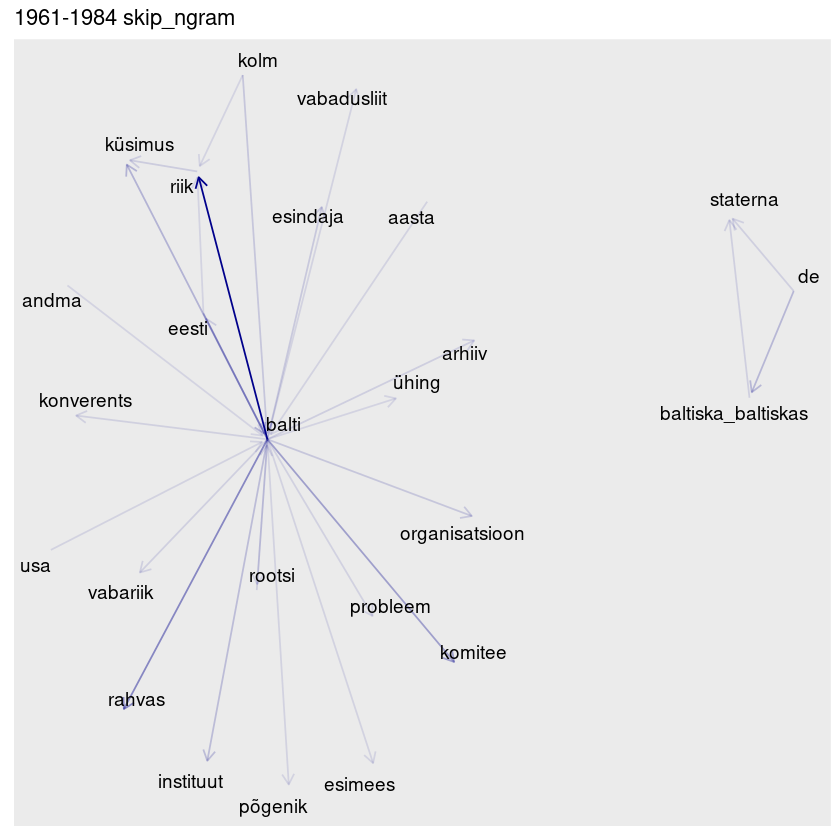

In [47]:
set.seed(2017)

a <- grid::arrow(type = "open", length = unit(.10, "inches"))

ggraph(bigram_graph2_1, layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = circle(.05, 'inches'), color = "darkblue") +
    geom_node_text(aes(label = name), repel = TRUE, size=4) +
ggtitle("1961-1984 skip_ngram")

In [48]:
rootsi_ajalehed3 <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(year>1984&year<1996) %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [49]:
searchfile <- "rootsi_ngrammid3.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed3, searchtype="lemmas", source="pages")

In [50]:
concs3 <- fread("rootsi_ngrammid3.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
concs3[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta_concs3 <- concs3 %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed3 %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [51]:
rootsi_concs3 <- get_concordances(searchterm=searchterm,texts=concs3,before=50,after=50,txt="lemmas",id="id")

In [52]:
rootsi_concs_8595 <- rootsi_concs3[, !c("id","nr","begin","end", "DocumentID")]

write.table(rootsi_concs_8595, "8595.txt", sep="\t", quote = F, row.names = F)

In [53]:
rootsi_concs_8595_2 <- str_replace_all(rootsi_concs_8595$context, "\\|", "_")

rootsi_concs_8595_3 <- as.data.frame(rootsi_concs_8595_2, header = TRUE)
colnames(rootsi_concs_8595_3) <- "context"
head(rootsi_concs_8595_3, 10)

,context
,<chr>
1,"aruanne konstateerima , et vene keel oskus olema baltikumi » üha enam USA-rapori nimetama otseselt Öigus"
2,", N.liit . ( VES ). Ilo Käbin - mees Armeemmiseum balti näitus taga kindlasti olema palju kaasmaalane kas"
3,"sti tutvustama Baltikum rahvas , Baltimaa kui Ita balti riik ajalugu , eriti kuna see olema Rootsi võrdle"
4,"_koht a . 1977. aasta hiljem võitma sama meeskond balti karikas , mis olema vast kõige suurem edu . hilje"
5,"amisc ” näol . Berliin olema Idaministeeriu - mis balti küsimus osakond juhataja dr , Peter von Kleist po"
6,"esti rahvusnõukogu esimees Mihkel Mathfesen EKN , balti komitee ja Eesti komitee traditsioniliscl uueaast"
7,ueaasta päev kogunema vastuvõtt sadakond eesti ja balti organisatsioon esindaja ning rootsipoolne külalin
8,"lismaa koondis , Mihkel Mathiesen-Rahvusnõukogu , balti komitee , balti arhiiv ja ajaleht ” Teataja ” aua"
9,"Mihkel Mathiesen-Rahvusnõukogu , balti komitee , balti arhiiv ja ajaleht ” Teataja ” auaadress , Valdo N"


In [54]:
bigrams_separated3 <- rootsi_concs_8595_3 %>%
  unnest_tokens(bigram, context, token = "ngrams", n = 2) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

In [55]:
bigrams_filtered3 <- bigrams_separated3 %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word)

In [56]:
bigram_counts3 <- bigrams_filtered3 %>% 
  count(word1, word2, sort = TRUE)

In [57]:
bigram_graph3 <- bigram_counts3 %>%
  filter(row_number() <= 30) %>%
  graph_from_data_frame()

In [58]:
bigram_graph3

IGRAPH 434db02 DN-- 32 30 -- 
+ attr: name (v/c), n (e/n)
+ edges from 434db02 (vertex names):
 [1] balti             ->riik              
 [2] balti             ->rahvas            
 [3] kolm              ->balti             
 [4] de                ->baltiska_baltiskas
 [5] balti             ->komitee           
 [6] balti             ->küsimus           
 [7] balti             ->instituut         
 [8] balti             ->vabadusliit       
+ ... omitted several edges

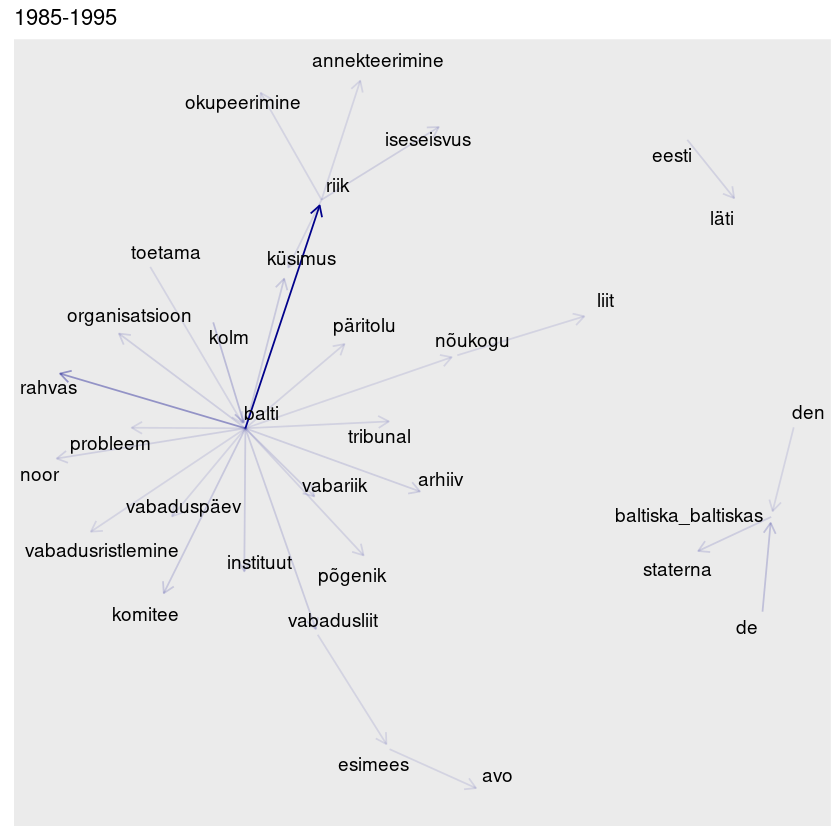

In [59]:
set.seed(2017)

a <- grid::arrow(type = "open", length = unit(.10, "inches"))

ggraph(bigram_graph3, layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = circle(.05, 'inches'), color = "darkblue") +
    geom_node_text(aes(label = name), repel = TRUE, size=4) +
ggtitle("1985-1995")

In [60]:
#suurendan tähemärkide vahemikku 100 peale
rootsi_concs3_1 <- get_concordances(searchterm=searchterm,texts=concs3,before=100,after=100,txt="lemmas",id="id")

In [61]:
rootsi_concs_8595_3_1 <- rootsi_concs3_1[, !c("id","nr","begin","end", "DocumentID")]

write.table(rootsi_concs_8595_3_1, "8595_3.txt", sep="\t", quote = F, row.names = F)

In [62]:
rootsi_concs_8595_3_2 <- str_replace_all(rootsi_concs_8595_3_1$context, "\\|", "_")

rootsi_concs_8595_3_3 <- as.data.frame(rootsi_concs_8595_3_2, header = TRUE)
colnames(rootsi_concs_8595_3_3) <- "context"
head(rootsi_concs_8595_3_3, 10)

,context
,<chr>
1,"ähem minevik palju Imltimaalane . esitama_esitatud aruanne konstateerima , et vene keel oskus olema baltikumi » üha enam USA-rapori nimetama otseselt Öigusnõudleja Enn Tarto karistamine 10aastane vangistus"
2,"asedu vägivaldne ja ebaseaduslik inkorporeerimine , N.liit . ( VES ). Ilo Käbin - mees Armeemmiseum balti näitus taga kindlasti olema palju kaasmaalane kasutama_kasutanud piihadevaheaeg külastama Stockholm"
3,"ne näitus mõte Stockholm Ärmeemuuseum olema kindlasti tutvustama Baltikum rahvas , Baltimaa kui Ita balti riik ajalugu , eriti kuna see olema Rootsi võrdlemisi vähe tundma_tuntud noorem generatsioon . näit"
4,"kond Liidu_Liidud_Liit meistrivõistlus neljas koha_koht a . 1977. aasta hiljem võitma sama meeskond balti karikas , mis olema vast kõige suurem edu . hiljem minema tema meisterfotograaf juurde tootmiskoond"
5,"selt , kohalik okupatsioonivõim ” silmakinntpigtstamisc ” näol . Berliin olema Idaministeeriu - mis balti küsimus osakond juhataja dr , Peter von Kleist positiivselt aktiivne eestirootslane taotlus . Saks_"
6,"gas olema tekkima uus grupeering , konstateerima Eesti rahvusnõukogu esimees Mihkel Mathfesen EKN , balti komitee ja Eesti komitee traditsioniliscl uueaasta vastuvõtt oma sõnavõtt , nimetama see grupeering"
7,"iu & amp ; t """""""" Eesti organisatsioon uit """""""". uueaasta päev kogunema vastuvõtt sadakond eesti ja balti organisatsioon esindaja ning rootsipoolne külaline . järg lk . 7-----------------------------------"
8,"ltuur koond , Joh . Mihkelson-E . Sots . partei välismaa koondis , Mihkel Mathiesen-Rahvusnõukogu , balti komitee , balti arhiiv ja ajaleht ” Teataja ” auaadress , Valdo Nemvalz-Filat . Ühing , Herman Raja"
9,"h . Mihkelson-E . Sots . partei välismaa koondis , Mihkel Mathiesen-Rahvusnõukogu , balti komitee , balti arhiiv ja ajaleht ” Teataja ” auaadress , Valdo Nemvalz-Filat . Ühing , Herman Rajamaa-Eesti Karsku"


In [63]:
bigrams_separated3_1 <- rootsi_concs_8595_3_3 %>%
  unnest_tokens(bigram, context, token = "skip_ngrams", n = 3, k = 3) %>%
  separate(bigram, c("word1", "word2"), sep = " ")

bigrams_separated3_2 <- na.omit(bigrams_separated3_1)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 3938016 rows [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 27, 28, 29, 30, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 300756 rows [1, 22, 43, 64, 85, 106, 127, 148, 169, 190, 211, 232, 253, 274, 295, 316, 337, 358, 378, 396, ...].”


In [64]:
bigrams_filtered3_1 <- bigrams_separated3_2 %>%
  filter(!word1 %in% stopsonad$word) %>%
  filter(!word2 %in% stopsonad$word)

In [65]:
bigram_counts3_1 <- bigrams_filtered3_1 %>% 
  count(word1, word2, sort = TRUE)

In [66]:
bigram_graph3_1 <- bigram_counts3_1 %>%
  filter(row_number() <= 30) %>%
  graph_from_data_frame()

In [67]:
bigram_graph3_1

IGRAPH ea6c7c5 DN-- 25 30 -- 
+ attr: name (v/c), n (e/n)
+ edges from ea6c7c5 (vertex names):
 [1] balti ->riik               balti ->rahvas            
 [3] eesti ->balti              kolm  ->balti             
 [5] balti ->küsimus            de    ->baltiska_baltiskas
 [7] eesti ->läti               balti ->komitee           
 [9] rootsi->balti              kolm  ->riik              
[11] balti ->balti              läti  ->leedu             
[13] balti ->eesti              balti ->esindaja          
[15] balti ->vabadusliit        eesti ->leedu             
+ ... omitted several edges

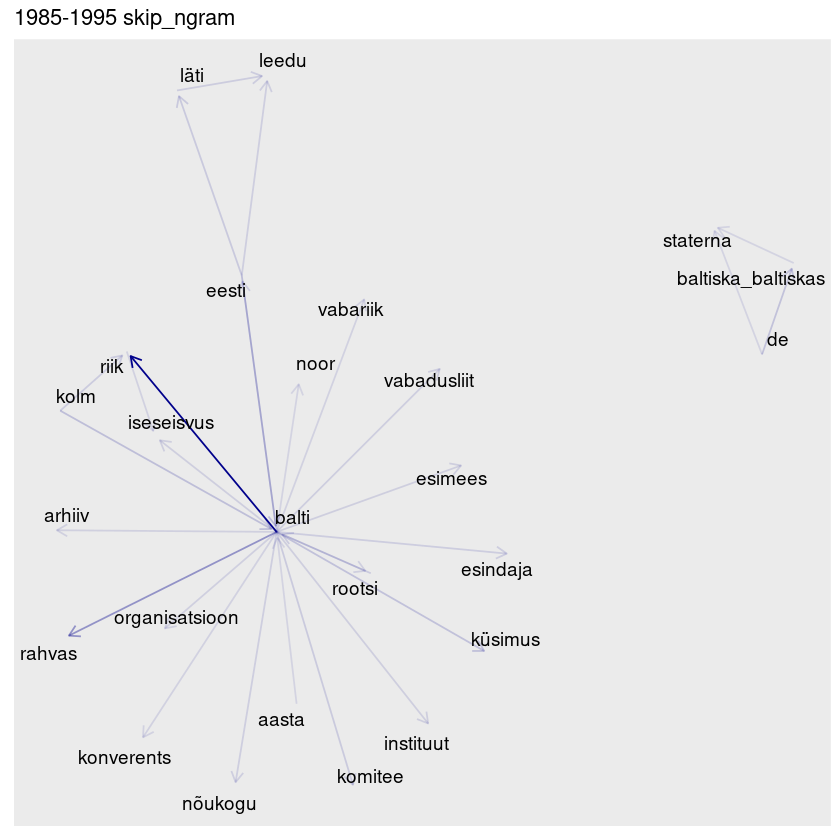

In [69]:
set.seed(2017)

a <- grid::arrow(type = "open", length = unit(.10, "inches"))

ggraph(bigram_graph3_1, layout = "fr") +
    geom_edge_link(aes(edge_alpha = n), show.legend = FALSE, arrow = a, end_cap = circle(.05, 'inches'), color = "darkblue") +
    geom_node_text(aes(label = name), repel = TRUE, size=4) +
ggtitle("1985-1995 skip_ngram")